In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Loading dataset
df = pd.read_csv('winequality-red-2.csv')

In [6]:
#Let's check how the data is distributed
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# What is the total size of the dataset?
df.shape

(1599, 12)

In [9]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
# Deleting all columns except two 
columns_to_delete = ["fixed acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
                      "density", "pH", "sulphates", "alcohol"]
# axis=1 means that the operation is executed in the columns, axis=0 is in the rows
df_processed = df.drop(columns_to_delete, axis=1)
df_processed.head()

,volatile acidity,citric acid,quality
0,0.70,0.00,5
1,0.88,0.00,5
2,0.76,0.04,5
3,0.28,0.56,6
4,0.70,0.00,5


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

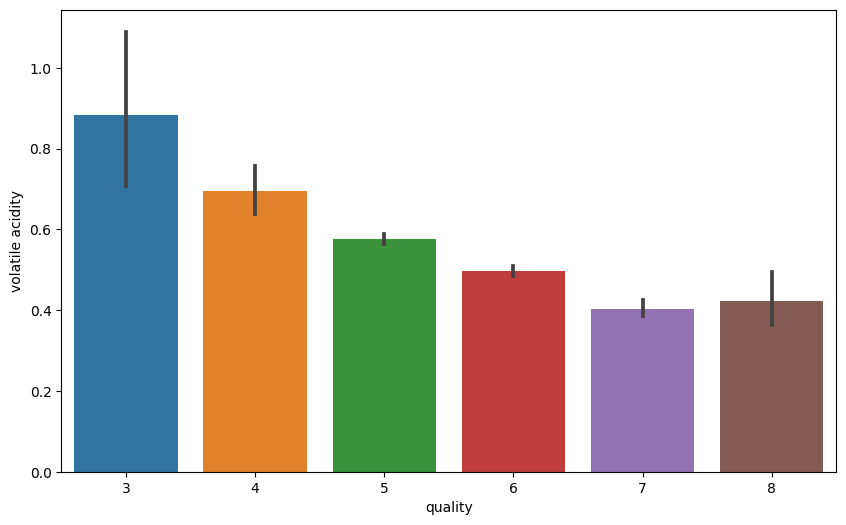

In [15]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df_processed)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

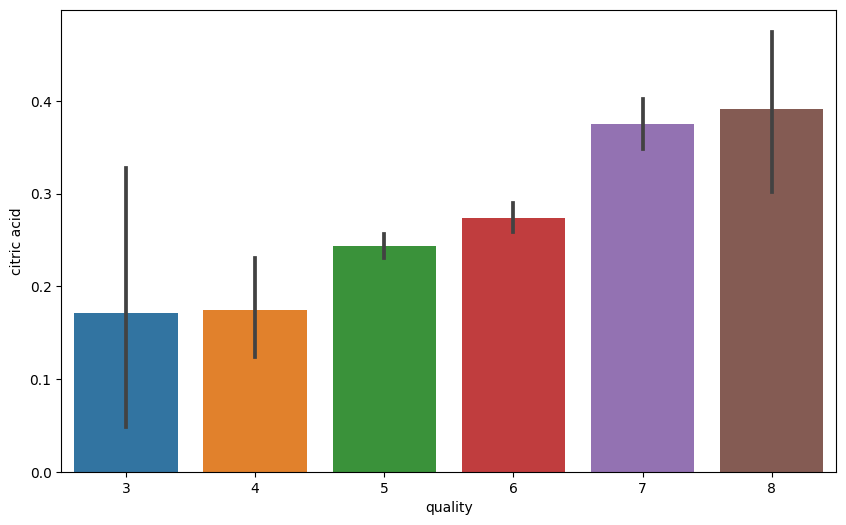

In [16]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df_processed)

In [18]:
# Count missing values per feature
df_processed.isnull().sum()

volatile acidity    0
citric acid         0
quality             0
dtype: int64

In [19]:
# X, y split
X = df_processed[df_processed.columns[:-1]]

y = df_processed[df_processed.columns[-1]]

In [23]:
type(y)

pandas.core.series.Series

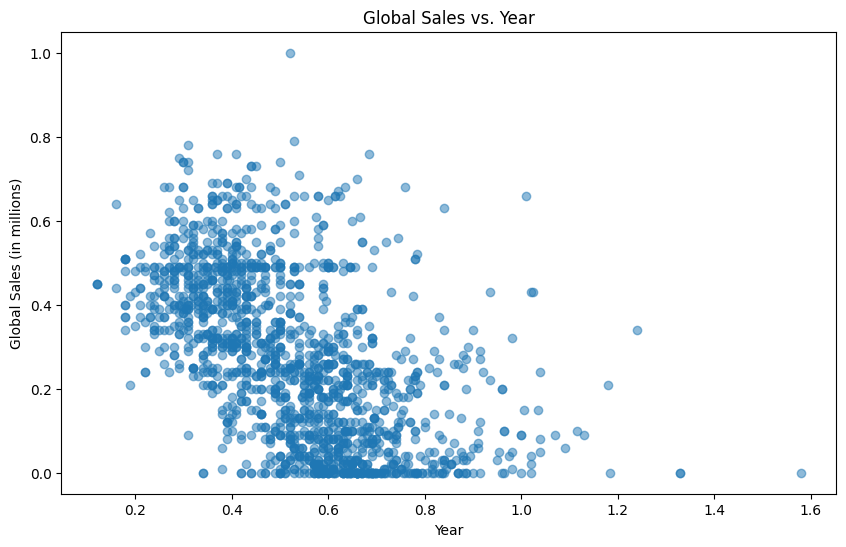

In [25]:
# Scatter Plot - Global Sales vs. Year
plt.figure(figsize=(10, 6))
plt.scatter(df['volatile acidity'], df['citric acid'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales vs. Year')
plt.show()
